<a href="https://colab.research.google.com/github/PrathameshKR/ML-projects/blob/main/DL-models/Dog_Vs_Cat_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dog vs cat classification using transfer learning

In [ ]:
!pip install kaggle

In [ ]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

###Importing Dogs vs Cats dataset from kaggle

In [ ]:
#kaggle api
!kaggle competitions download -c dogs-vs-cats

In [ ]:
#extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

In [ ]:
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The extraction is complete")

The extraction is complete


In [ ]:
#extracting train.zip
dataset = '/content/train.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The extraction is complete")

The extraction is complete


In [ ]:
import os
#counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print("Number of images :",file_count)

Number of images : 25000


In [ ]:
#Printing the name of images
file_names = os.listdir('/content/train')
print(file_names)

['cat.4270.jpg', 'dog.10963.jpg', 'cat.2081.jpg', 'cat.1292.jpg', 'dog.1192.jpg', 'cat.2287.jpg', 'cat.3104.jpg', 'cat.12417.jpg', 'dog.9930.jpg', 'cat.10963.jpg', 'dog.9224.jpg', 'cat.7284.jpg', 'cat.5528.jpg', 'cat.3842.jpg', 'cat.6929.jpg', 'cat.6621.jpg', 'cat.3234.jpg', 'dog.7153.jpg', 'cat.9310.jpg', 'cat.5931.jpg', 'dog.8692.jpg', 'dog.349.jpg', 'dog.11736.jpg', 'cat.450.jpg', 'dog.3168.jpg', 'cat.8567.jpg', 'cat.689.jpg', 'cat.11986.jpg', 'dog.11568.jpg', 'cat.1440.jpg', 'cat.2089.jpg', 'dog.7367.jpg', 'cat.10617.jpg', 'dog.3733.jpg', 'dog.5983.jpg', 'dog.7813.jpg', 'cat.1120.jpg', 'cat.9609.jpg', 'dog.977.jpg', 'cat.3807.jpg', 'dog.9966.jpg', 'cat.10920.jpg', 'cat.1742.jpg', 'cat.10333.jpg', 'dog.5239.jpg', 'dog.5898.jpg', 'dog.12138.jpg', 'dog.1489.jpg', 'cat.12383.jpg', 'cat.3607.jpg', 'cat.11969.jpg', 'dog.7523.jpg', 'dog.909.jpg', 'cat.2945.jpg', 'cat.11983.jpg', 'cat.8510.jpg', 'cat.7705.jpg', 'cat.3554.jpg', 'cat.11948.jpg', 'cat.4790.jpg', 'dog.4220.jpg', 'dog.4189.jpg'

In [ ]:
###Importing dependencies
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

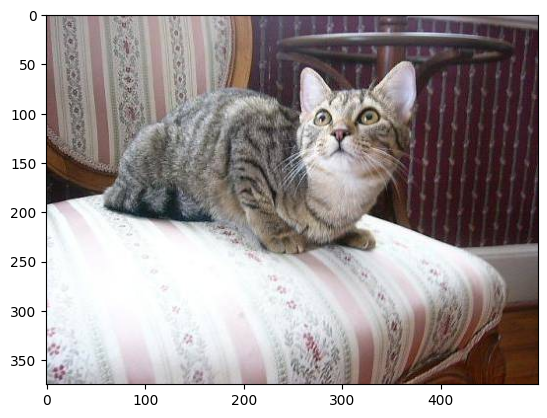

In [ ]:
###Checking the datapoint by displaying its correspoding image
img = mpimg.imread('/content/train/cat.1292.jpg')
plt.imshow(img)

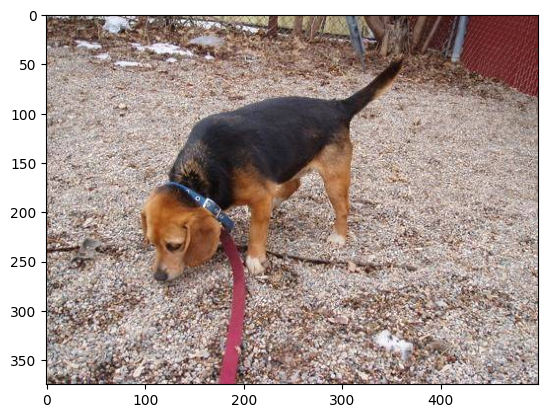

In [ ]:
img = mpimg.imread('/content/train/dog.10963.jpg')
plt.imshow(img)

In [ ]:
#counting the number of images for each label
file_names = os.listdir('/content/train')

dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[:3]

  if (name == 'dog'):
    dog_count+= 1
  else:
    cat_count+= 1

print("Number of dog images:",dog_count)
print("Number of cat images:",cat_count)

Number of dog images: 12500
Number of cat images: 12500


###Resizing all the images

In [ ]:
#creating directory for resized imagee
os.mkdir('/content/image_resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image_resized/'

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img =img.convert('RGB')

  new_img_path = resized_folder+filename
  img.save(new_img_path)

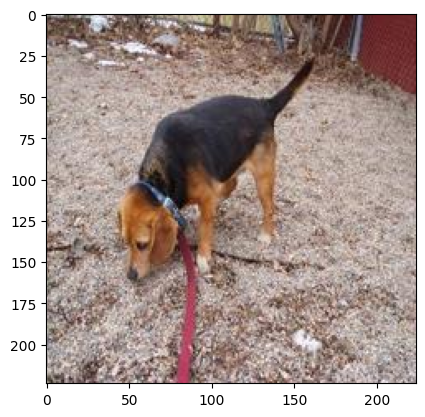

In [ ]:
#Checking the datapoint by displaying its correspoding image
img = mpimg.imread('/content/image_resized/dog.10963.jpg')
plt.imshow(img)

###creating labels for resized images of dogs and cats
Cat --> 0


Dog --> 1

In [ ]:
#creating a loop to assign labels to images
filenames = os.listdir('/content/image_resized/')

labels = []
for i in range(2000):

  file_name = filenames[i]
  label = file_name[:3]

  if (label == 'dog'):
    labels.append(1)
  else:
    labels.append(0)

In [ ]:
#cross verification
print(filenames[:5])

['cat.4270.jpg', 'dog.10963.jpg', 'cat.2081.jpg', 'cat.1292.jpg', 'dog.1192.jpg']


In [ ]:
print(labels[:5])

[0, 1, 0, 0, 1]


In [ ]:
#counting the number of images of dogs and cats
values,count = np.unique(labels,return_counts=True)
print(values)
print(count)

[0 1]
[1030  970]


###Converting all resized images to numpy array

In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image_resized/'
image_extensions = ['png','jpg'] #this ensures that we have considered both extensions

files =[]

for ext in image_extensions: #This line starts a loop that goes through each file extension in the list image_extensions.
    files.extend(glob.glob(os.path.join(image_directory, '*' + ext))) #

dog_cat_images = np.asarray([cv2.imread(file) for file in files])  #cv2.imread() returns a NumPy array representing the image,the result is a list of image arrays.
#np.asarray(...)
#Converts the list of image arrays into a single NumPy array.

1. os.path.join(image_directory, '*' + ext)

* This constructs a search pattern like:

    * /path/to/images/*.jpg

    * /path/to/images/*.png

2. glob.glob(...)

* This returns a list of all filenames in the directory that match the pattern. For example, if there are three .jpg files, it returns a list of their paths.

3. files.extend(...)
* This adds all the matched files from the current extension into the files list.

In [ ]:
print(dog_cat_images)

[[[[ 13  13  13]
   [ 13  13  13]
   [ 13  13  13]
   ...
   [ 24  29  28]
   [ 24  29  28]
   [ 24  29  28]]

  [[ 13  13  13]
   [ 13  13  13]
   [ 13  13  13]
   ...
   [ 25  30  29]
   [ 25  30  29]
   [ 25  30  29]]

  [[ 13  13  13]
   [ 13  13  13]
   [ 13  13  13]
   ...
   [ 26  31  30]
   [ 26  31  30]
   [ 26  31  30]]

  ...

  [[  8  13  12]
   [ 10  15  14]
   [ 11  16  15]
   ...
   [105 114 128]
   [106 115 129]
   [111 120 134]]

  [[ 12  17  16]
   [ 15  20  19]
   [ 16  21  20]
   ...
   [107 116 130]
   [106 115 129]
   [110 119 133]]

  [[ 16  21  20]
   [ 20  25  24]
   [ 20  25  24]
   ...
   [108 117 131]
   [104 113 127]
   [108 117 131]]]


 [[[179 185 184]
   [145 151 150]
   [156 161 160]
   ...
   [ 42  40 106]
   [ 43  41 107]
   [ 43  41 107]]

  [[169 174 177]
   [135 140 141]
   [118 123 126]
   ...
   [ 42  40 106]
   [ 40  38 104]
   [ 38  36 102]]

  [[ 96 101 110]
   [ 78  84  91]
   [ 63  68  77]
   ...
   [ 44  42 108]
   [ 40  38 104]
   [ 37  35

In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

###Creating train test split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [ ]:
#scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

##Building the neural network

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2

# Wrap the pretrained_model with tf.keras.layers.Layer
# to ensure it's treated as a Keras layer.
class MyLayer(tf.keras.layers.Layer):
  def __init__(self, model):
    super(MyLayer, self).__init__()
    self.model = model

  def call(self, inputs):
    return self.model(inputs)

wrapped_model = MyLayer(pretrained_model)
# Now build the model with the wrapped model
model = tf.keras.Sequential([
    wrapped_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ my_layer (MyLayer)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

In [ ]:
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - acc: 0.7849 - loss: 0.5501
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - acc: 0.9810 - loss: 0.0586
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - acc: 0.9850 - loss: 0.0420
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - acc: 0.9889 - loss: 0.0351
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - acc: 0.9971 - loss: 0.0249


In [ ]:
score,acc = model.evaluate(X_test_scaled,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - acc: 0.9680 - loss: 0.0941


In [ ]:
print("Test loss:",score)
print("Test accuracy",acc)

Test loss: 0.06526832282543182
Test accuracy 0.9750000238418579


###Building a Predictive system

In [ ]:
def classifier(input_img_path):
  #Convert image into numpy array
  input_image = cv2.imread(input_img_path)

  #show the image
  cv2_imshow(input_image)

  #resize the image
  input_resized = cv2.resize(input_image,(224,224))

  #scaling the input
  input_scaled = input_resized/255

  #reshaping the input as we are predicting for only single datapoint
  input_reshaped = np.reshape(input_scaled,[1,224,224,3]) #[1,224,224,3] means 1 image of 224 x 224 having 3 channels(or RGB)

  input_prediction = model.predict(input_reshaped)

  #converting prediction probabilites to labels
  input_label = np.argmax(input_prediction)

  if (input_label == 0):
    print("Given image is of a cat.")
  else:
    print("Given image is of a dog.")

Enter image path:/content/dog.jpg


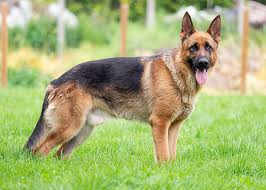

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Given image is of a dog.


In [ ]:
img_path = input("Enter image path:")
classifier(img_path)

Enter image path:/content/cat.jpg


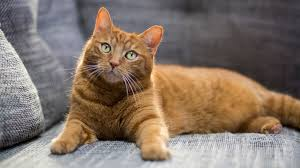

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Given image is of a cat.


In [ ]:
img_path = input("Enter image path:")
classifier(img_path)